In [166]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix

In [167]:
X, y = load_breast_cancer(return_X_y=True)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)

In [169]:
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

In [170]:
classifier = LogisticRegression()
#classifier.fit(X_train_scaled, y_train)

In [171]:
pipe = Pipeline([
    ("scaler", scaler),
    ("classifier", classifier)
])
pipe.fit(X_train, y_train)
y_train_preds = pipe.predict(X_train)
y_test_preds = pipe.predict(X_test)

y_train_probs = pipe.predict_proba(X_train)[:, 1]
y_test_probs =  pipe.predict_proba(X_test)[:, 1]
y_train_preds[:10], y_test_preds[:10]

(array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0]), array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0]))

In [172]:
def score(y_true, y_pred, y_probs):
    print("f1:", f1_score(y_true, y_pred))
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("precison:", precision_score(y_true, y_pred))
    print("recall:", recall_score(y_true, y_pred))
    print("roc_auc:", roc_auc_score(y_true, y_probs))

In [173]:
score(y_train, y_train_preds, y_train_probs)

f1: 0.9911504424778761
accuracy: 0.989010989010989
precison: 0.9893992932862191
recall: 0.9929078014184397
roc_auc: 0.998995613495675


In [174]:
score(y_test, y_test_preds, y_test_probs)

f1: 0.9801324503311258
accuracy: 0.9736842105263158
precison: 0.9736842105263158
recall: 0.9866666666666667
roc_auc: 0.9863247863247864


In [175]:
confusion_matrix(y_test, y_test_preds)

array([[37,  2],
       [ 1, 74]])

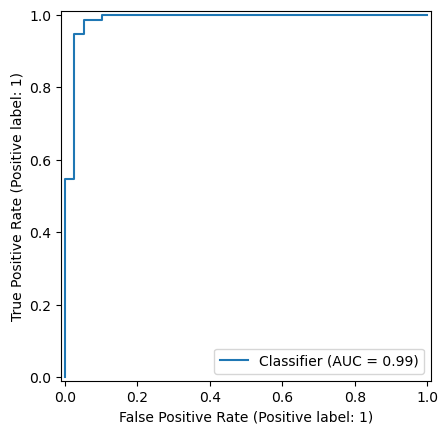

In [181]:
RocCurveDisplay.from_predictions(y_test, y_test_probs)
plt.show()